In [1]:
import pandas as pd
import numpy as np
from skll.metrics import kappa
import pandas as pd
from matplotlib import pyplot as plt
from kappa_loss_nn import KappaLossNN 
from sklearn.preprocessing import StandardScaler

Playground notebook for KappaLossPerceptron

In [3]:
df = pd.read_csv("./data/preprocessed_data.csv", index_col=0)
TARGET = "NSP"
FEATURES = df.columns.drop(TARGET)
Xdf = df[FEATURES]
ydf = df[TARGET]
NUM_CLASSES = 3
# Without normalizing the data, the optimizer got stuck in local minima
X = StandardScaler().fit(Xdf.values).transform(Xdf.values)
y = ydf.values - 1 #type: ignore
# X = Xdf.values
# need to have the classes start at 0 instead of 1 for scoring to work properly

weights = np.array([
# Predicted   N    S    P     # True
            [0.0, 0.5, 0.6],  # N
            [1.0, 0.0, 0.3],  # S
            [2.0, 0.6, 0.0]   # P
])

klp = KappaLossNN(
    num_classes=NUM_CLASSES, weight_matrix=weights, alpha=.02, 
    hidden_layer_shapes=[]
    )


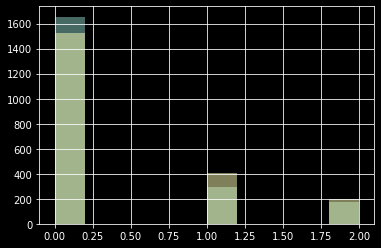

Score: 0.7955985948916254


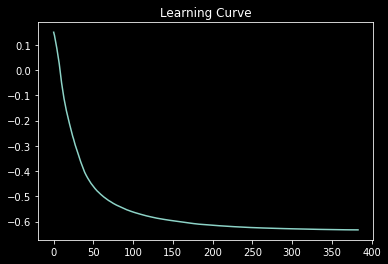

In [4]:
klp.fit(X, y, max_iter=10000, verbose=False)#, clean=False)
y_hat = klp.predict(X)
pd.Series(y).hist(alpha=.5) 
pd.Series(y_hat).hist(alpha=.5) 
plt.show()
pd.Series(klp.loss_values).astype(float).plot(title="Learning Curve")
print("Score:", klp.prediction_kappa(X, y))

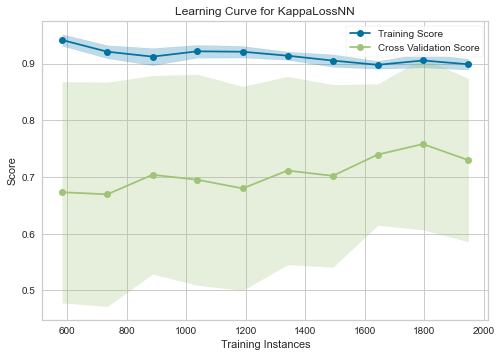

<AxesSubplot:title={'center':'Learning Curve for KappaLossNN'}, xlabel='Training Instances', ylabel='Score'>

In [18]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
from sklearn.metrics import make_scorer

def weightedKappa(x, y): return kappa(x, y, weights=weights)
kappaScorer = make_scorer(weightedKappa)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
visualizer = LearningCurve(
    klp, cv=cv, scoring=kappaScorer, train_sizes=sizes, n_jobs=-1
)

x = visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figuremport numpy as np

Stopping early after 547 iterations.
Stopping early after 665 iterations.
Stopping early after 691 iterations.
Stopping early after 709 iterations.
Stopping early after 749 iterations.
Stopping early after 785 iterations.
Stopping early after 841 iterations.
Stopping early after 812 iterations.
Stopping early after 830 iterations.
Stopping early after 816 iterations.
Stopping early after 798 iterations.
Stopping early after 868 iterations.
Stopping early after 681 iterations.
Stopping early after 581 iterations.
Stopping early after 545 iterations.
Stopping early after 707 iterations.
Stopping early after 661 iterations.
Stopping early after 752 iterations.
Stopping early after 848 iterations.
Stopping early after 789 iterations.
Stopping early after 725 iterations.
Stopping early after 721 iterations.
Stopping early after 789 iterations.
Stopping early after 726 iterations.
Stopping early after 753 iterations.
Stopping early after 802 iterations.
Stopping early after 806 iterations.
S

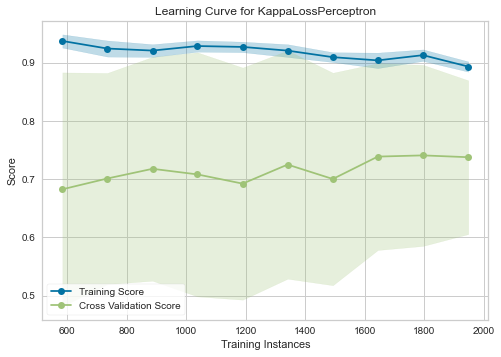

<AxesSubplot:title={'center':'Learning Curve for KappaLossPerceptron'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
from sklearn.metrics import make_scorer


# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
visualizer = LearningCurve(
    klp, cv=cv, scoring=kappaScorer, train_sizes=sizes, n_jobs=-1
)

x = visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figuremport numpy as np